# Расчет даты через N рабочих дней.
# Либо рассчитать количество рабочих дней между двумя датами.

## [Содержание:](#Content)
> [**Задача №1. <br>
Поставщик поставил товар сегодня. По условиям договора нужно заплатить через 20 рабочих дней.<br>
Найти дату оплаты.**](#task_one)

> [**Задача №2. <br>
Посчитать количество рабочих дней между двумя датами. <br>
Часть 1.**](#task_two_part1)
> [**<br>Часть 2. Добавление интерактива**](#task_two_part2)


## <a name="task_one"> Задача №1: Поставщик поставил товар сегодня. По условиям договора нужно заплатить через 20 рабочих дней. Найти дату оплаты.</a>

Можно использодвать имеющуюся в Pandas функцию BDay (pandas.tseries.offsets.BDay). Но в неё включены только "календарные" выходные, т.е. суббота и воскресенье!
Чтобы учитывать национальные праздники, нужно создать собственный класс, используя *AbstractHolidayCalendar*.

В созданном классе **RUBusinessCalendar** прописываем все национальные праздники используя *rules* и *Holiday*.
Если праздник приходится на выходной день (сб, вс), то следующий понедельник будет выходной. Это достигается через *observance = next_monday*

В переменной **Bdays** указываем количество рабочих дней, которые нам известны по задаче, а именно: 20.

Переменные **out_format** и **out_fone** используются для форматирования текста в ячейках вывода (OUT)

In [1]:
# Импорт необходимых модулей.
from pandas.tseries.offsets import CustomBusinessDay
from pandas.tseries.holiday import AbstractHolidayCalendar, next_monday, Holiday
from pandas import Timestamp, date_range
from datetime import datetime
from termcolor import colored

# Создание собственного календаря, в который вносим все официальные праздники (В данном случае России)
class RUBusinessCalendar(AbstractHolidayCalendar):
    rules = [
        Holiday('Новый год', month = 1, day = 1),
        Holiday('Новый год', month = 1, day = 2),
        Holiday('Новый год', month = 1, day = 3),
        Holiday('Новый год', month = 1, day = 4),
        Holiday('Новый год', month = 1, day = 5),
        Holiday('Новый год', month = 1, day = 6),
        Holiday('Рождество', month = 1, day = 7),
        Holiday('Новый год', month = 1, day = 8),
        
        Holiday('День защитника Отечества', month = 2, day = 23, observance = next_monday),       
        Holiday('Международный женский день', month = 3, day = 8, observance = next_monday),
        
        Holiday('Праздник Весны и Труда', month = 5, day = 1, observance = next_monday),
        Holiday('День Победы', month = 5, day = 9, observance = next_monday),
        
        Holiday('День России', month = 6, day = 12, observance = next_monday),
        Holiday('День народного единства', month = 11, day = 4, observance = next_monday)        
    ]
    
#Кол-во рабочих дней когда нужно заплатить (в нашем случае 20)
Bdays = 20    

# Формат текста для вывода
out_format = ['bold', 'underline']

# Фон текста для вывода
out_fone = 'on_white' # возможные варианты 'on_red', 'on_yellow' и т.д.

Создаем экземпляр Класса *CustomBusinessDay* и в нем присваиваем **n** наши искомые рабочие дни (по-умолчанию n=1) и наш созданный календарь *RUBusinessCalendar*.

В переменной **ts** указываем сегодняшнюю дату.

В функции *print* используется модуль *colored* для форматирования текста в ячейках вывода.
<br>(Модуль *colored* устанавливается дополнительно).<br>
Также прописываем аттрибуты *attrs* и *on_color*.

In [2]:
# Создание экземпляра класса CustomBusinessDay, в котором указываем необходимое количество дней 
# и наш пользовательский календарь
rus_calendar = CustomBusinessDay(n= Bdays, calendar=RUBusinessCalendar())

# Сегодняшняя дата
ts = datetime.now()

# Вывод на экран
print(colored('Ответ:', attrs=out_format, on_color=out_fone))
print(colored('Через {} рабочих дней будет: {}'.format(Bdays, (ts + rus_calendar).strftime("%d.%m.%Y")), 
              attrs= out_format, on_color=out_fone))

Ответ:
Через 20 рабочих дней будет: 23.06.2020


## <a name="task_two_part1">Задача №2. Посчитать количество рабочих дней между двумя датами.<br> Часть1: </a>

Допустим что стоит обратная задача. Есть две даты и нужно вычислить количество рабочих дней между ними.

Взял дату создания этого документа в качестве начальной даты (20.05.2020).
В качестве конечной взял 18 июня 2020 года, чтобы в указанном промежутки был национальный праздик (12.06.2020).

Снова создаем экземпляр Класса *CustomBusinessDay*. Но теперь указыаем только созданный календарь *RUBusinessCalendar* (т.е. N=1).

Далее создаем рабочие дни между начальной и конечной датами (*dt*). Считаем кол-во элементов через встроенную функцию *len* и выводим ответ.

In [3]:
# Начальная дата
start_date = '20.05.2020' # формат дд.мм.гггг

# Конечная дата
end_date = '18.06.2020' # формат дд.мм.гггг

# Создание экземпляра класса CustomBusinessDay, в котором только наш пользовательский календарь
rus_calendar2 = CustomBusinessDay(calendar=RUBusinessCalendar())

# Определение диапазона между двумя датами.
dt = date_range(start=start_date, end=end_date, freq=rus_calendar2, tz="Europe/Moscow")

# Расчет рабочих дней
dt_business = len(dt)-1

# Вывод на экран
print(colored('Ответ:', attrs= out_format, on_color=out_fone))
print(colored('Количество рабочих дней между {} и {} равно {}.'.format(start_date,end_date, dt_business), 
              attrs=out_format, on_color=out_fone))

Ответ:
Количество рабочих дней между 20.05.2020 и 18.06.2020 равно 20.


## <a name="task_two_part2"> Задача 2. Часть 2. Добавление интерактива </a>

Чтобы не вводить даты вручную можно использовать виджеты, в которых можно выбрать дату:

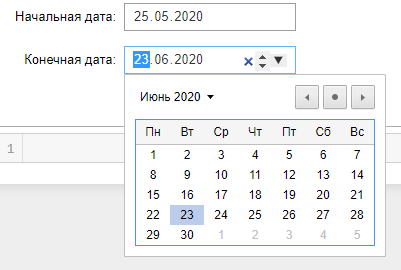

Для этого загужаем виджеты для Календаря и Кнопок.

In [4]:
# Загрузка модулей
from IPython.display import display
from ipywidgets import DatePicker, Button, Layout

Далее пишем функцию, в которой считаются рабочие дни.

In [5]:
def count_bday(sdate, edate):
    # Начальная дата
    start_date = sdate.strftime("%d.%m.%Y")
#     print(start_date)

    # Конечная дата
    end_date = edate.strftime("%d.%m.%Y")
#     print(end_date)

    # Определение диапазона между двумя датами.
    dt = date_range(start=start_date, end=end_date, freq=rus_calendar2, tz="Europe/Moscow")

    # Расчет рабочих дней
    dt_business = len(dt)-1
#     print(dt_business)

    # Вывод на экран
    print(colored('Ответ:', attrs= out_format, on_color=out_fone))
    print(colored('Количество рабочих дней между {} и {} равно {}.'.format(start_date,end_date, dt_business), 
                  attrs=out_format, on_color=out_fone))

Создаем виджеты **DatePicker** и **Button** (для двух Календарей для одной кнопки).

По-умолчанию, дата в первом календаре будет текущая дата. Во-втором - текущая дата плюс Bdays (в первой задаче равнялось 20).

После создания виджетов указываем необходимые для нас форматы.

Затем создаем функции для обработки событий при нажатии на кнопку или при выборе новой даты.

Отслеживаем события при помощи *observe* для **DatePicker** и *on_click* для **Button**.

И, наконец, отображаем виджеты с помощью *display*.

In [6]:
# Установка календарей по-умолчанию.
widget_start = ts # Сегодняшняя дата. Указывалась в самом начале.
widget_end = ts + rus_calendar # Сегодняшняя дата + переменная Bdays

# Создание виджера календаря для начальной даты
dPicker = DatePicker(
    description = 'Начальная дата:', 
    value = widget_start
)

# Создание виджера календаря для конечной даты
dPicker2 = DatePicker(
    description = 'Конечная дата:', 
    value = widget_end
)

# Создание кнопки
btn = Button(
    description='Посчитать дни',
    button_style='success', # 'success', 'info', 'warning', 'danger' or ''
    layout=Layout(margin='0 130px'),     
)

# Дополнительные форматы для виджетов
dPicker.style.description_width='120px'
dPicker2.style = dPicker.style
dPicker2.layout = dPicker.layout
btn.style.font_weight = 'bold'

# Функции для обработки событий.
def on_clicked_start_date(b):    
    global widget_start, widget_end
    widget_start =  b['new']
    count_bday(widget_start, widget_end)
    
def on_clicked_end_date(b):
    global widget_start, widget_end
    widget_end = b['new']
    count_bday(widget_start, widget_end)
    
def on_clicked_button(b):    
    count_bday(widget_start, widget_end)    

# Отслеживание событий    
dPicker.observe(on_clicked_start_date, names='value')
dPicker2.observe(on_clicked_end_date, names='value')
btn.on_click(on_clicked_button)

# Отображение виджетов
display(dPicker, dPicker2, btn)

DatePicker(value=datetime.datetime(2020, 5, 25, 16, 0, 35, 108995), description='Начальная дата:', style=Descr…

DatePicker(value=Timestamp('2020-06-23 16:00:35.108995'), description='Конечная дата:', style=DescriptionStyle…

Button(button_style='success', description='Посчитать дни', layout=Layout(margin='0 130px'), style=ButtonStyle…

**Ниже приведен скриншот с рабочего кода. На githube виджеты заблокированы. Поэтому вместо них и виден текст выше.**

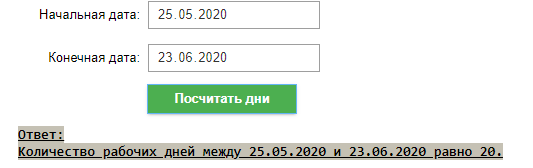